In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
IMAGE_SIZE = 150
CHANNELS = 3

train_datagen = ImageDataGenerator(
    rescale=1./150,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 901 images belonging to 3 classes.


In [62]:
train_generator.class_indices


{'healthy': 0, 'segatoka': 1, 'xamthomonas': 2}

In [63]:
class_names = list(train_generator.class_indices.keys())
class_names

['healthy', 'segatoka', 'xamthomonas']

In [16]:
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.32889384 0.33714923 0.17714924]
  [0.2530531  0.2530531  0.09305308]
  [0.20697263 0.20697263 0.04697264]
  ...
  [0.28539008 0.3168085  0.16886523]
  [0.2834894  0.3120568  0.16221288]
  [0.28158873 0.30730513 0.15556052]]

 [[0.33554623 0.34570226 0.18570228]
  [0.2711095  0.2711095  0.11110948]
  [0.19366792 0.19366792 0.03366792]
  ...
  [0.27276313 0.28324538 0.11925386]
  [0.27181277 0.27754334 0.10689947]
  [0.27086246 0.27184135 0.0945451 ]]

 [[0.34219858 0.3542553  0.1942553 ]
  [0.28916588 0.28916588 0.12916589]
  [0.18036321 0.18036321 0.0203632 ]
  ...
  [0.26666668 0.24666667 0.04      ]
  [0.26666668 0.24666667 0.04      ]
  [0.26666668 0.24666667 0.04      ]]

 ...

 [[0.15333334 0.11333334 0.02      ]
  [0.15333334 0.11333334 0.02      ]
  [0.15333334 0.11333334 0.02      ]
  ...
  [1.1030128  1.2030128  0.7686752 ]
  [0.9841675  1.078071   0.6691235 ]
  [0.78645396 0.873759   0.4972341 ]]

 [[0.18270378 0.14270377 0.05776199]
  [0.18935613 0.14935613 0.06631502]


In [17]:
validation_datagen = ImageDataGenerator(
    rescale=1./150,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = train_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 128 images belonging to 3 classes.


In [18]:
test_datagen = ImageDataGenerator(
    rescale=1./150,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = train_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 260 images belonging to 3 classes.


In [22]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[6.10341787e-01 4.92437810e-01 4.50489461e-01]
  [1.08689356e+00 8.82765293e-01 7.88430035e-01]
  [5.89017391e-01 3.22363198e-01 1.80891365e-01]
  ...
  [1.23235092e-01 1.05254732e-01 3.91957909e-02]
  [1.26599088e-01 1.07945941e-01 4.39053848e-02]
  [1.29963085e-01 1.10637136e-01 4.86149825e-02]]

 [[5.80738664e-01 4.71581012e-01 4.34342295e-01]
  [1.03643358e+00 8.41051757e-01 7.52098858e-01]
  [6.51587784e-01 3.90988767e-01 2.54226536e-01]
  ...
  [1.33333340e-01 1.13333337e-01 5.33333346e-02]
  [1.33333340e-01 1.13333337e-01 5.33333346e-02]
  [1.33333340e-01 1.13333337e-01 5.33333346e-02]]

 [[5.51135421e-01 4.50724185e-01 4.18195099e-01]
  [9.85973656e-01 7.99338222e-01 7.15767622e-01]
  [7.14158177e-01 4.59614307e-01 3.27561706e-01]
  ...
  [1.33333340e-01 1.13333337e-01 5.33333346e-02]
  [1.33333340e-01 1.13333337e-01 5.33333346e-02]
  [1.33333340e-01 1.13333337e-01 5.33333346e-02]]

 ...

 [[2.06666678e-01 2.60000020e-01 0.00000000e+00]
  [2.06666678e-01 2.60000020e-01 0.0000

In [24]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 18, 18, 64)      

In [26]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [27]:
901/32

28.15625

In [28]:
128/32

4.0

In [38]:
history = model.fit(
    train_generator,
    steps_per_epoch=28,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=1,
    epochs=20
)

Epoch 1/20
28/28 [==============================] - 20s 723ms/step - loss: 0.4255 - accuracy: 0.8067 - val_loss: 0.5005 - val_accuracy: 0.7578
Epoch 2/20
28/28 [==============================] - 20s 721ms/step - loss: 0.3517 - accuracy: 0.8481 - val_loss: 0.7567 - val_accuracy: 0.7109
Epoch 3/20
28/28 [==============================] - 20s 696ms/step - loss: 0.4319 - accuracy: 0.8136 - val_loss: 0.5051 - val_accuracy: 0.7812
Epoch 4/20
28/28 [==============================] - 20s 709ms/step - loss: 0.3633 - accuracy: 0.8423 - val_loss: 0.4955 - val_accuracy: 0.7812
Epoch 5/20
28/28 [==============================] - 20s 694ms/step - loss: 0.3441 - accuracy: 0.8389 - val_loss: 0.6673 - val_accuracy: 0.7578
Epoch 6/20
28/28 [==============================] - 19s 713ms/step - loss: 0.3662 - accuracy: 0.8458 - val_loss: 0.5565 - val_accuracy: 0.7656
Epoch 7/20
28/28 [==============================] - 20s 702ms/step - loss: 0.3417 - accuracy: 0.8297 - val_loss: 0.5092 - val_accuracy: 0.7422

In [42]:
scores = model.evaluate(test_generator)

9/9 [==============================] - 2s 238ms/step - loss: 0.7269 - accuracy: 0.7885


In [43]:
scores

[0.7269468903541565, 0.7884615659713745]

# Plotting the Accuracy and Loss Curves

In [45]:
history

In [46]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 28}

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
type(history.history['loss'])

list

In [49]:
len(history.history['loss'])


20

In [50]:
history.history['loss'][:5]

[0.42554596066474915,
 0.35174188017845154,
 0.4319286048412323,
 0.36325404047966003,
 0.34411725401878357]

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [52]:
val_acc

[0.7578125,
 0.7109375,
 0.78125,
 0.78125,
 0.7578125,
 0.765625,
 0.7421875,
 0.71875,
 0.7265625,
 0.796875,
 0.7109375,
 0.6484375,
 0.71875,
 0.75,
 0.734375,
 0.7578125,
 0.765625,
 0.796875,
 0.765625,
 0.7578125]

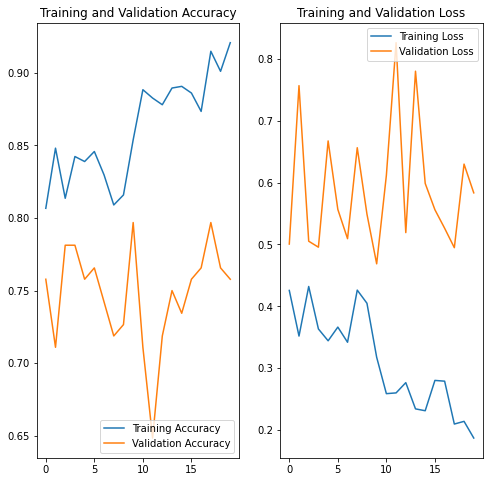

In [53]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Run prediction on sample image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


first image to predict
actual label: xamthomonas
1/1 [==============================] - 0s 148ms/step
predicted label: xamthomonas


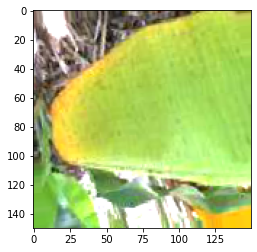

In [66]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

# Write a funtion for inference

In [67]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

# Now run inference on few sample images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 45ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 33ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 35ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 38ms/step


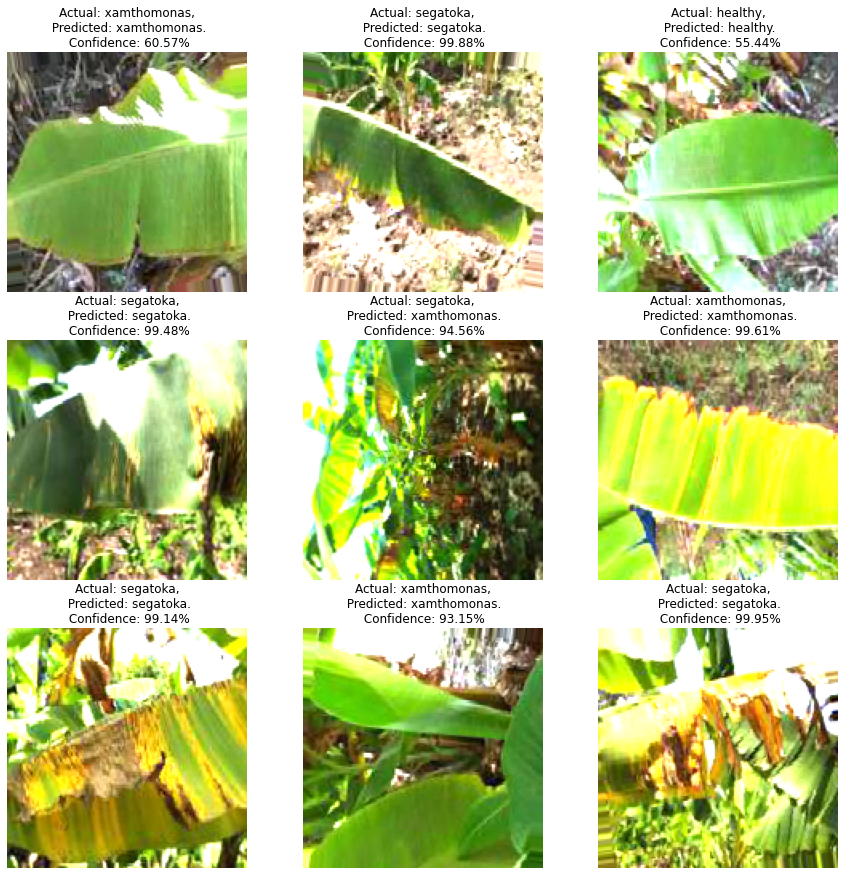

In [69]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

# Saving the Model

In [70]:
model.save("../banana.h5")